<a href="https://colab.research.google.com/github/withopenWaigua/draw_picture/blob/main/%E7%89%B9%E5%BE%81%E4%B9%8B%E9%97%B4_%E9%83%A8%E5%88%86%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E7%B1%BB%E5%88%AB%E6%AF%94%E8%BE%83%E5%9E%8B%E5%9B%BE%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mydata = pd.DataFrame({'Cut':['Fair','Good','Very Good','Premium','Ideal'],'Price':[4300,3800,3950,4700,3500]})
mydata

,Cut,Price
0,Fair,4300
1,Good,3800
2,Very Good,3950
3,Premium,4700
4,Ideal,3500


In [3]:
Sort_data = mydata.sort_values(by='Price',ascending=False)
Sort_data

,Cut,Price
3,Premium,4700
0,Fair,4300
2,Very Good,3950
1,Good,3800
4,Ideal,3500


In [4]:
Sort_data['Cut'] = pd.Categorical(Sort_data['Cut'],ordered=True,categories=Sort_data['Cut'])
Sort_data

,Cut,Price
3,Premium,4700
0,Fair,4300
2,Very Good,3950
1,Good,3800
4,Ideal,3500


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


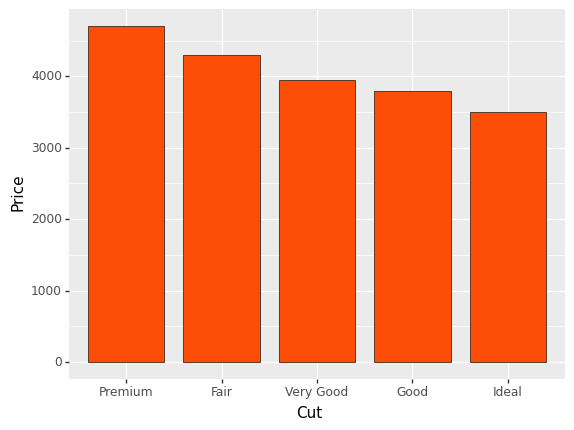

<ggplot: (8761302744173)>

In [5]:
base_plot = (
    ggplot(Sort_data,aes('Cut','Price'))
    +geom_bar(
        stat='identity',width=0.8,color='black',size=0.25,fill='#FC4E07',alpha=1
    )
)
base_plot
# ggplot画柱形图要用Catgorical同时设置字符排序

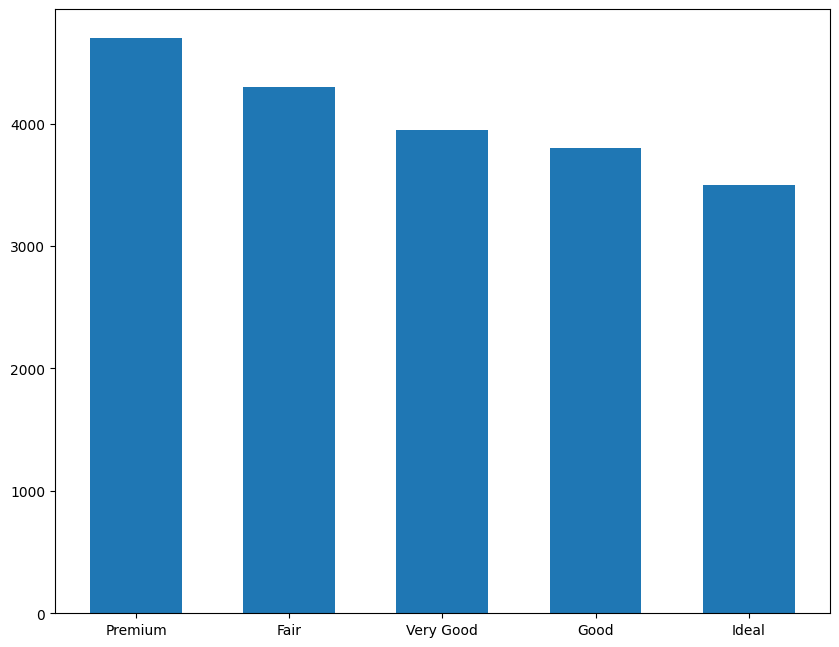

In [6]:
mydata = pd.DataFrame({'Cut':['Fair','Good','Very Good','Premium','Ideal'],'Price':[4300,3800,3950,4700,3500]})
mydata
plt.figure(figsize=(10,8),dpi=100)
mydata2 = mydata.sort_values(by='Price',ascending=False)
plt.bar(mydata2['Cut'],mydata2['Price'],width=0.6,align='center',label='Cut')
plt.show()

In [7]:
df = pd.read_csv('MultiColumn_Data.csv')
df

,Catergory,1996,1997
0,Temporary\nStream,7.67,5.84
1,Permanent\nStream,4.02,6.45
2,Lake,3.95,6.76


In [8]:
df.sort_values(by='1996',ascending=False)

,Catergory,1996,1997
0,Temporary\nStream,7.67,5.84
1,Permanent\nStream,4.02,6.45
2,Lake,3.95,6.76


In [9]:
df

,Catergory,1996,1997
0,Temporary\nStream,7.67,5.84
1,Permanent\nStream,4.02,6.45
2,Lake,3.95,6.76


In [10]:
pd.melt(df,id_vars='Catergory')

,Catergory,variable,value
0,Temporary\nStream,1996,7.67
1,Permanent\nStream,1996,4.02
2,Lake,1996,3.95
3,Temporary\nStream,1997,5.84
4,Permanent\nStream,1997,6.45
5,Lake,1997,6.76


In [11]:
mydata = pd.melt(df,id_vars='Catergory')
mydata['Catergory'] = pd.Categorical(mydata['Catergory'],ordered=True,categories=df['Catergory'])

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


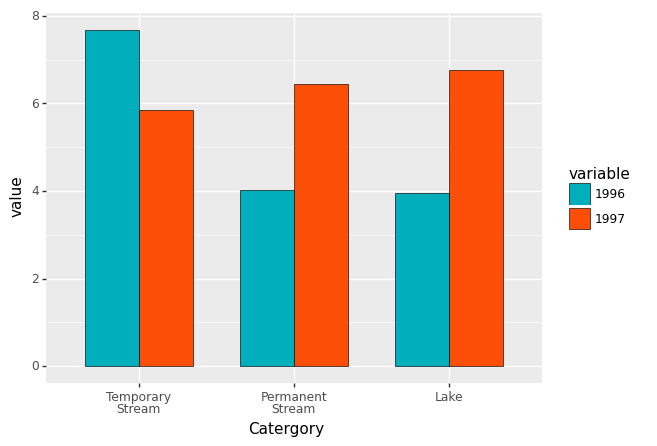

<ggplot: (8761302695889)>

In [12]:
(
    ggplot(mydata,aes('Catergory','value',fill='variable'))
    +geom_bar(stat='identity',width=0.7,size=0.25,position='dodge',color='black')
    +scale_fill_manual(values=['#00AFBB','#FC4E07','#E7B800'])

)

matplotlib

In [13]:
df = pd.read_csv('MultiColumn_Data.csv')
df

,Catergory,1996,1997
0,Temporary\nStream,7.67,5.84
1,Permanent\nStream,4.02,6.45
2,Lake,3.95,6.76


In [14]:
df.sort_values(by='1996',ascending=False)
x_label=df['Catergory']
y1 =np.array(df['1996'])
y2 =np.array(df['1997'])
fig =plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [15]:
x = np.arange(len(x_label))

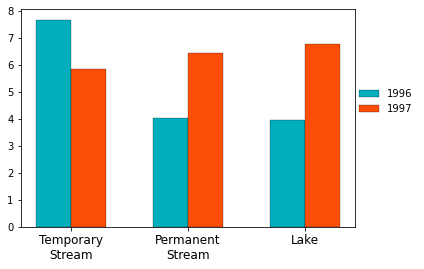

In [16]:
plt.bar(x,y1,width=0.3,color='#00AFBB',label='1996',edgecolor='k',linewidth=0.25)
plt.bar(x+0.3,y2,width=0.3,color='#FC4E07',label='1997',edgecolor='k',linewidth=0.25)
plt.xticks(x+0.15,x_label,size=12)
plt.legend(loc=(1,0.5),ncol=1,frameon=False)
plt.show()


堆积柱形图

In [17]:
df = pd.read_csv('StackedColumn_Data.csv')
df

,Clarity,I1,SI2,SI1,VS2,VS1,S2,S1,IF
0,Fair,150,400,390,300,130,100,100,150
1,Good,1200,1100,1700,900,790,1300,1200,1100
2,Very_Good,1300,2300,3300,1900,1800,1900,1700,1300
3,Premium,2800,2900,3500,2800,3000,1800,1600,1280
4,Ideal,2000,2700,4200,3300,4200,2700,2100,1300


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


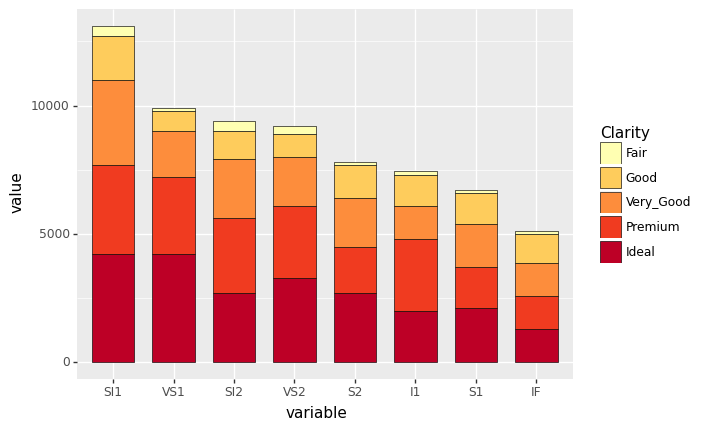

<ggplot: (8761299690073)>

In [18]:
Sum_df = df.iloc[:,1:].apply(lambda x:x.sum()).sort_values(ascending=False)
meanRow_df = df.iloc[:,1:].apply(lambda x:x.mean(),axis=1)
Sing_df = df['Clarity'][meanRow_df.sort_values(ascending=True).index]
mydata =pd.melt(df,id_vars='Clarity')
mydata['variable'] = mydata['variable'].astype(pd.CategoricalDtype(categories=Sum_df.index,ordered=True))
mydata['Clarity'] = mydata['Clarity'].astype(pd.CategoricalDtype(categories=Sing_df,ordered=True))

base_plot=(
    ggplot(mydata,aes(x='variable',y='value',fill='Clarity')
           )
    +geom_bar(stat='identity',color='k',position='stack',width=0.7,size=0.25)
    +scale_fill_brewer(palette='YlOrRd')
)
base_plot

百分比堆积图
- 用于显示单特征间样本的分布比例

In [19]:
df = pd.read_csv('StackedColumn_Data.csv')
df

,Clarity,I1,SI2,SI1,VS2,VS1,S2,S1,IF
0,Fair,150,400,390,300,130,100,100,150
1,Good,1200,1100,1700,900,790,1300,1200,1100
2,Very_Good,1300,2300,3300,1900,1800,1900,1700,1300
3,Premium,2800,2900,3500,2800,3000,1800,1600,1280
4,Ideal,2000,2700,4200,3300,4200,2700,2100,1300


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


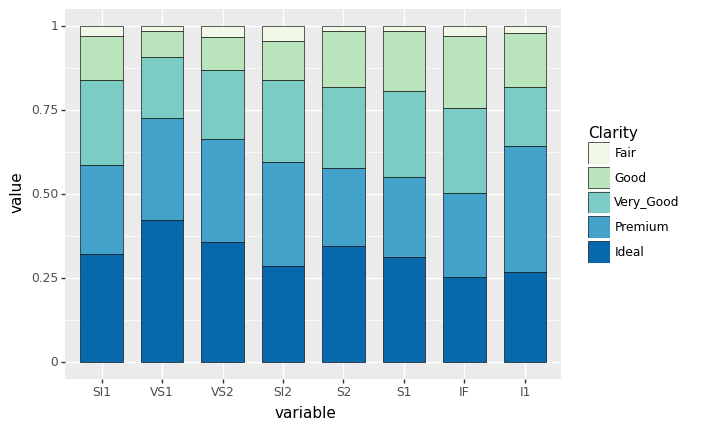

<ggplot: (8761302720421)>

In [20]:

SumCol_df = df.iloc[:,1:].apply(lambda x: x.sum(),axis=0)
df.iloc[:,1] = df.iloc[:,1:].apply(lambda x:x/SumCol_df,axis=1)
meanRow_df =df.iloc[:,1:].apply(lambda x:x.mean(),axis=1)
Per_df = df.iloc[meanRow_df.idxmax(),1:].sort_values(ascending=False)
Sing_df = df['Clarity'][meanRow_df.sort_values(ascending=True).index]
mydata = pd.melt(df,id_vars='Clarity')
mydata['Clarity'] = mydata['Clarity'].astype(pd.CategoricalDtype(categories=Sing_df,ordered=True))
mydata['variable'] = mydata['variable'].astype(pd.CategoricalDtype(categories=Per_df.index,ordered=True))
base_plot=(
    ggplot(mydata,aes(x='variable',y='value',fill='Clarity')
           )
    +geom_bar(stat='identity',color='k',position='fill',width=0.7,size=0.25)
    +scale_fill_brewer(palette='GnBu')
)
base_plot

# 条形图

堆积条形图
- barh

In [21]:
df = pd.read_csv('StackedBar_Data.csv')
df

,Country,Pensions,Income,Health,Other services
0,France,14,5,9,3
1,Sweden,8,6,7,8
2,Italy,15,4,7,1
3,Germany,11,5,8,3
4,Spain,9,7,7,2
5,Britain,6,6,8,4
6,OECD_average,8,5,6,3
7,United States,7,3,8,1


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


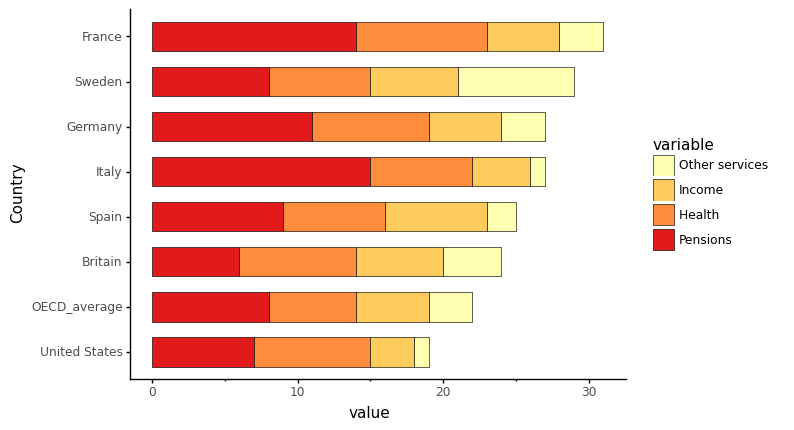

<ggplot: (8761299580261)>

In [22]:
Sum_df = df.iloc[:,1:].apply(lambda x:x.sum()).sort_values(ascending=True) # 比例不对就改这
meanRow_df = df.iloc[:,1:].apply(lambda x:x.mean(),axis=1)
Sing_df = df['Country'][meanRow_df.sort_values(ascending=True).index]
mydata =pd.melt(df,id_vars='Country')
mydata['variable'] = mydata['variable'].astype(pd.CategoricalDtype(categories=Sum_df.index,ordered=True))
mydata['Country'] = mydata['Country'].astype(pd.CategoricalDtype(categories=Sing_df,ordered=True))

base_plot=(
    ggplot(mydata,aes(x='Country',y='value',fill='variable')
           )
    +geom_bar(stat='identity',color='k',position='stack',width=0.65,size=0.25)
    +scale_fill_brewer(palette='YlOrRd')
    +coord_flip()
    +theme(
        axis_title = element_text(size=18,face='plain',color='black'),
        axis_text = element_text(size=16,face='plain',color='black'),
        legend_title = element_text(size=18,face='plain',color='black'),
        legend_text = element_text(size=16,face='plain',color='black'),
        legend_background = element_blank(),
        legend_position='right',
        aspect_ratio=1.15,
        figure_size = (6.5,6.5),
        dpi=75,
        

    )
    +theme_classic()
)
base_plot

不等宽柱形图

In [23]:
mydata = pd.DataFrame(dict(Name=['A','B','C','D','E'],Scale=[35,30,20,10,5],ARPU=[56,37,63,57,59]))
mydata

,Name,Scale,ARPU
0,A,35,56
1,B,30,37
2,C,20,63
3,D,10,57
4,E,5,59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/d

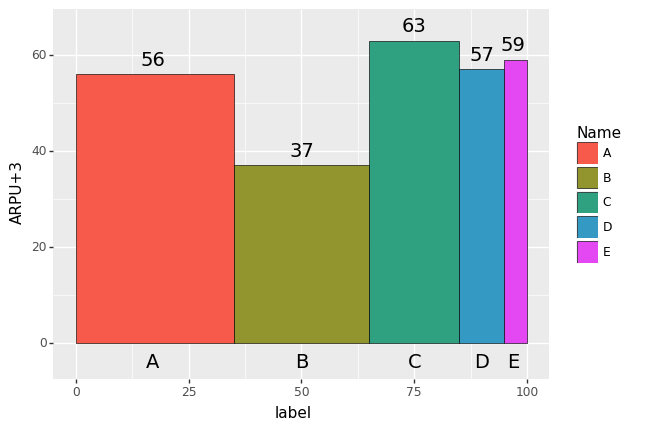

<ggplot: (8761299611953)>

In [24]:
mydata['xmin'] = 0
for i in range(0,5):
  mydata['xmin'][i] = np.sum(mydata['Scale'][0:i])


mydata['xmax'] = 0
for i in range(0,5):
  mydata['xmax'][i] = np.sum(mydata['Scale'][0:i+1])



mydata['label'] = 0
for i in range(0,5):
  mydata['label'][i] = np.sum(mydata['Scale'][0:i+1])-mydata['Scale'][i]/2
 
base_plot=(
    ggplot(mydata)
    +geom_rect(aes(xmin='xmin',xmax='xmax',ymin=0,ymax='ARPU',fill='Name'),color='black',size=0.25)
    +geom_text(aes(x='label',y='ARPU+3',label='ARPU'),size=14,color='black')
    +geom_text(aes(x='label',y=-4,label='Name'),size=14,color='black') 
    +scale_fill_hue(s=0.9,i=0.65,h=0.0417,color_space='husl')       
    )

base_plot

# 克利夫兰点图

In [25]:
df = pd.read_csv('DotPlots_Data.csv')
df.head()

,City,Female,Male
0,Acapulco,2565.51,2595.80
1,Bellingham,453.36,539.27
2,Beverly Hills,5050.46,5269.71
3,Bremerton,5269.89,5705.00
4,Camacho,3643.30,2154.15


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


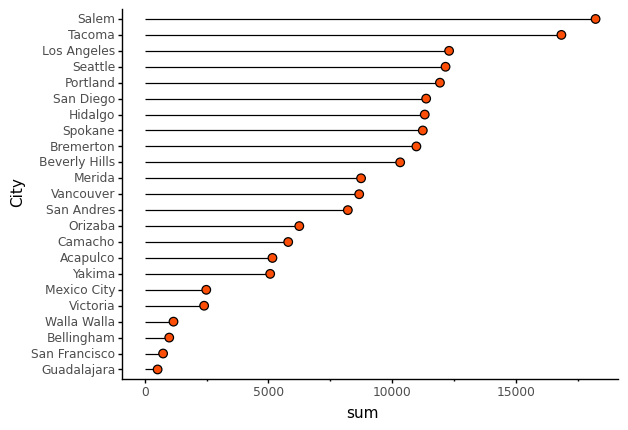

<ggplot: (8761299505117)>

In [26]:
df['sum'] = df.iloc[:,1:3].apply(np.sum,axis=1)
df = df.sort_values(by='sum',ascending=True)
df['City'] = df['City'].astype(pd.CategoricalDtype(categories=df['City'],ordered=True))

base_plot =(
    ggplot(df,aes('sum','City'))
    +geom_segment(aes(x=0,xend='sum',y='City',yend='City'))
    +geom_point(shape='o',size=3,color='black',fill='#FC4E07')
    +theme_classic()

)
base_plot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


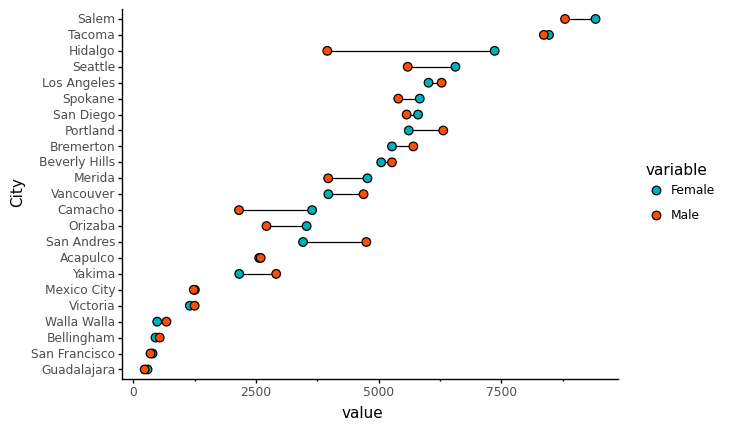

<ggplot: (8761302720405)>

In [27]:
df = pd.read_csv('DotPlots_Data.csv')
df = df.sort_values(by='Female',ascending=True)
df['City'] = df['City'].astype(pd.CategoricalDtype(categories=df['City'],ordered=True))
mydata=pd.melt(df,id_vars='City')

base_plot =(
    ggplot(mydata,aes('value','City',fill='variable'))
    +geom_line(aes(group='City'))
    +geom_point(shape='o',size=3,color='black')
    +scale_fill_manual(values=('#00AFBB','#FC4E07','#36BED9'))
    +theme_classic()

)
base_plot

坡度图

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_text : Removed 18 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


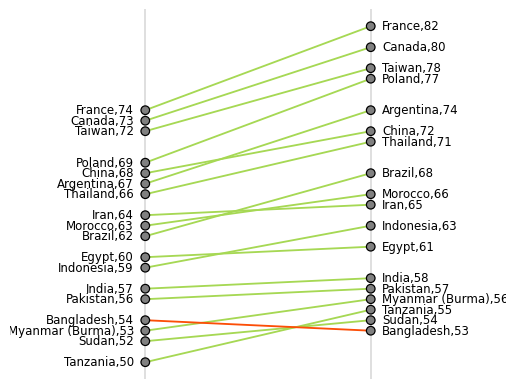

<ggplot: (8761299327129)>

In [28]:
df = pd.read_csv('Slopecharts_Data1.csv')
left_label = df.apply(lambda x:x['Contry']+','+str(x['1970']),axis=1)
right_label = df.apply(lambda x:x['Contry']+','+str(x['1979']),axis=1)
df['class'] = df.apply(lambda x:'red' if x['1979']-x['1970']<0 else "green",axis=1)

base_plot=(
    ggplot(df)
    +geom_segment(aes(x=1,xend=2,y='1970',yend='1979',color='class'),size=.75,show_legend=False)
    +geom_vline(xintercept=1,linetype='solid',size=.1)
    +geom_vline(xintercept=2,linetype='solid',size=.1)
    +geom_point(aes(x=1,y='1970'),size=3,shape='o',fill='grey',color='black')
    +geom_point(aes(x=2,y='1979'),size=3,shape='o',fill='grey',color='black')
    +scale_color_manual(labels=('Up','Down'),values=('#A6D854','#FC4E07'))
    +xlim(.5,2.5)
)
base_plot =(
    base_plot
    +geom_text(label=left_label,y=df['1970'],x=0.95,size=8.5,ha='right')
    +geom_text(label=right_label,y=df['1979'],x=2.05,size=8.5,ha='left')
    +geom_text(label='1970',x=1,y=1.02*(np.max(df[['1970','1979']])),size=12)
    +geom_text(label='1979',x=2,y=1.02*(np.max(df[['1970','1979']])),size=12)
    +theme_void()
)
base_plot

In [29]:
# 多年份对比
df = pd.read_csv('Slopecharts_Data2.csv')
df


,continent,2007,2008,2009,2010,2011,2012,2013
0,Germany,2428500.0,2473800.0,2374500.0,2476800.0,2570000.0,2626427.9,2705181.1
1,United Kingdom,2054237.7,1800710.8,1564467.9,1706301.9,1747315.6,1862190.7,1931407.6
2,France,1886792.1,1933195.0,1889231.0,1932801.5,1987699.4,2027969.8,2092928.4
3,Italy,1554198.9,1575143.9,1526790.4,1556028.6,1586209.0,1617154.7,1660133.6
4,Spain,1053161.0,1087749.0,1047831.0,1051342.0,1074940.5,1094290.0,1123495.9
5,Netherlands,571773.0,594481.0,571145.0,588414.0,607435.2,622714.0,639563.6
6,Sweden,337944.2,333255.7,291347.0,346536.4,386201.6,396188.4,409582.5
7,Austria,274019.8,282746.0,274818.2,286197.3,300891.3,310133.3,322190.4
8,Denmark,227533.9,235133.0,223985.3,235608.6,241148.1,249122.9,258155.3
9,Portugal,169319.2,171983.1,168503.6,172571.2,171632.4,168286.4,172647.7


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


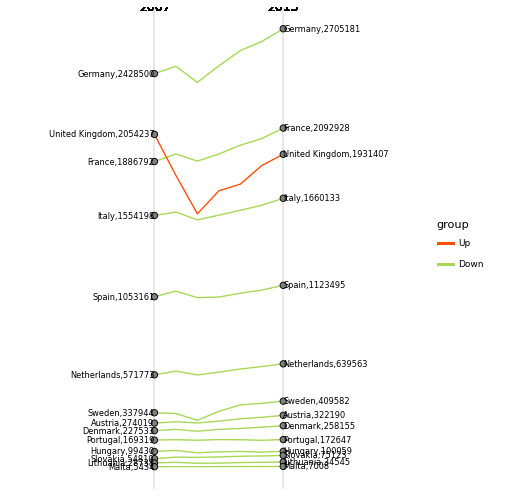

<ggplot: (8761299470521)>

In [30]:
df=pd.read_csv('Slopecharts_Data2.csv')

df['group']=df.apply(lambda x: "green" if x['2007']>x['2013'] else "red",axis=1)

df2=pd.melt(df, id_vars=["continent",'group'])

df2.value=df2.value.astype(int)
df2.variable=df2.variable.astype(int)

left_label =df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2007 else "",axis=1)
right_label=df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2013 else "",axis=1)

left_point=df2.apply(lambda x: x['value'] if x['variable']==2007 else np.nan,axis=1)
right_point=df2.apply(lambda x: x['value'] if x['variable']==2013 else np.nan,axis=1)

base_plot=(
    ggplot(df2)
    # +geom_segment(aes(x=1,xend=2,y='1970',yend='1979',color='class'),size=.75,show_legend=False)
    +geom_line(aes(x='variable',y='value',group='continent',color='group'),size=.75)
    +geom_vline(xintercept=2007,linetype='solid',size=.1)
    +geom_vline(xintercept=2013,linetype='solid',size=.1)
    +geom_point(aes(x='variable',y=left_point),size=3,shape='o',fill='grey',color='black')
    +geom_point(aes(x='variable', y=right_point),size=3,shape='o',fill='grey',color='black')
    +scale_color_manual(labels=('Up','Down'),values=('#FC4E07','#A6D854'))
    +xlim(2001,2018)
)

base_plot =(
    base_plot
    +geom_text(label=left_label,y=df2['value'],x=2007,size=8,ha='right')
    +geom_text(label=right_label,y=df2['value'],x=2013,size=8,ha='left')
    +geom_text(label='2007',x=2007,y=1.05*(np.max(np.max(df2.value))),size=12)
    +geom_text(label='2013',x=2013,y=1.05*(np.max(np.max(df2.value))),size=12)
    +theme_void()
    +  theme(
    aspect_ratio =1.2,
    figure_size = (7, 8),
     dpi = 74
  )
)
base_plot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


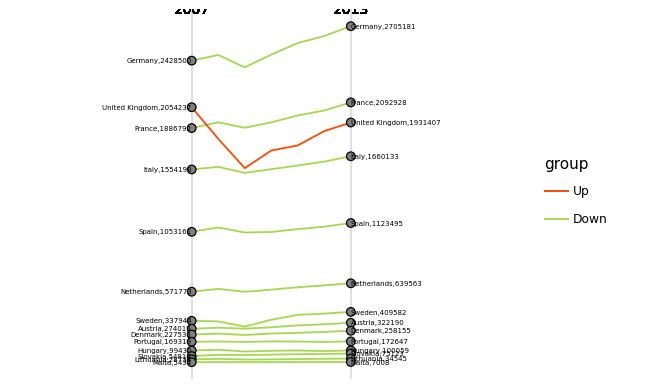

<ggplot: (8761297604937)>


In [38]:
df=pd.read_csv('Slopecharts_Data2.csv')

df['group']=df.apply(lambda x: "green" if x['2007']>x['2013'] else "red",axis=1)

df2=pd.melt(df, id_vars=["continent",'group'])

df2.value=df2.value.astype(int)
df2.variable=df2.variable.astype(int)

left_label =df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2007 else "",axis=1)
right_label=df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2013 else "",axis=1)

left_point=df2.apply(lambda x: x['value'] if x['variable']==2007 else np.nan,axis=1)
right_point=df2.apply(lambda x: x['value'] if x['variable']==2013 else np.nan,axis=1)



base_plot=( ggplot(df2) + 
  geom_line(aes(x='variable', y='value',group='continent', color='group'),size=.75) + 
  geom_vline(xintercept=2007, linetype="solid", size=.1) + 
  geom_vline(xintercept=2013, linetype="solid", size=.1) +
  geom_point(aes(x='variable', y=left_point), size=3,shape='o',fill="grey",color="black") + 
  geom_point(aes(x='variable', y=right_point), size=3,shape='o',fill="grey",color="black") + 
  scale_color_manual(labels = ("Up", "Down"), values = ("#FC4E07",  "#A6D854")) +  
  xlim(2001, 2018) )

base_plot=( base_plot + geom_text(label=left_label, y=df2['value'], x=2007, size=5,ha='right')
+ geom_text(label=right_label, y=df2['value'], x=2013, size=5,ha='left')
+ geom_text(label="2007", x=2007, y=1.05*(np.max(df2.value)),size=10)   
+ geom_text(label="2013", x=2013, y=1.05*(np.max(df2.value)), size=10) 
+theme_void()
+  theme(
    # aspect_ratio =1.2,
    # figure_size = (7, 9),
    #  dpi = 100
  )
)

print(base_plot)

# 南丁玫瑰图
- 是堆积柱形图的映射
- 优点：
- 适合于对比数值相近的
- 适用于反映周期性的序数型数据
- 在数据比较多的时候更能节省空间 

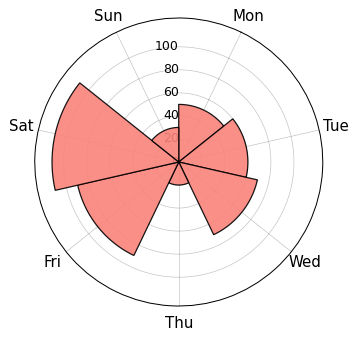

In [48]:
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
plt.rc('axes',axisbelow=True)  

#-------------------------------(a)单数据系列---------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Price=[50, 60, 70, 20,90,110,30]))
n_row = mydata.shape[0]
angle =np.arange(0,2*np.pi,2*np.pi/n_row)
radius = np.array(mydata.Price)
fig = figure(figsize=(4,4),dpi=90)
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)

ax.set_theta_offset(np.pi/2-np.pi/n_row)

#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)

ax.set_rlabel_position(360-180/n_row)
#plt.bar(angle,radius, color='#70A6FF',edgecolor="k",width=0.90,alpha=0.9)
plt.bar(angle,radius, color='#F9837A',edgecolor="k",width=0.90,alpha=0.9)
#x轴坐标轴标签
plt.xticks(angle,labels=mydata.day,size=12)
#plt.ylim(-15,125)     
plt.ylim(0,125)   
plt.yticks(np.arange(0,120,20),verticalalignment='center',horizontalalignment='right')

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.show()

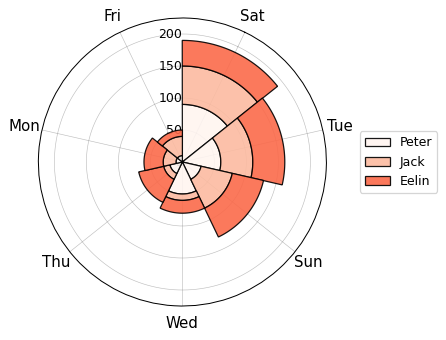

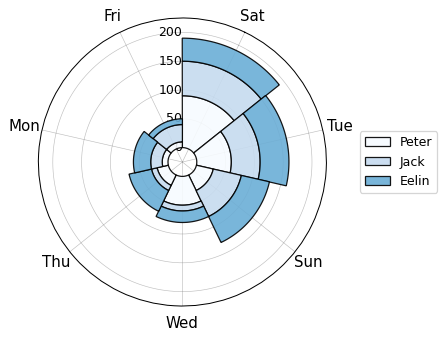

In [51]:
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

mydata['sum']=mydata.iloc[:,1:4].apply(np.sum,axis=1)

mydata=mydata.sort_values(by='sum', ascending=False)#.iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
    #极坐标条形图，polar为True
cmap=cm.get_cmap('Reds',n_col)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
  
    
fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)
  
p1 = plt.bar(angle,radius1, color=color[0],edgecolor="k",width=0.90,alpha=0.9,label="Peter")
p2 = plt.bar(angle,radius2, color=color[1],edgecolor="k",width=0.90, bottom=radius1,alpha=0.9,label="Jack")
p3 = plt.bar(angle,radius3, color=color[2],edgecolor="k",width=0.90, bottom=radius1+radius2,alpha=0.9,label="Eelin")
#p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)
    
#plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

plt.ylim(0,225)
plt.xticks(angle,labels=mydata.day,size=12)
plt.yticks(np.arange(0,201,50),verticalalignment='center',horizontalalignment='right')
#plt.ylim(-25,225)       
#plt.yticks(np.arange(0,225,50)) 

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('极坐标图3.pdf')


#-------------------------------(d)多数据系列-------------------------------------------
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

mydata['sum']=mydata.iloc[:,1:4].apply(np.sum,axis=1)

mydata=mydata.sort_values(by='sum', ascending=False)#.iloc[:,0:3]
#df['City']=df['City'].astype("category",categories= df['City'],ordered=True)
n_row = mydata.shape[0]
n_col = mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)
    #极坐标条形图，polar为True
cmap=cm.get_cmap('Blues',n_col)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
  
    
fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    
#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)
  
p1 = plt.bar(angle,radius1, color=color[0],edgecolor="k",width=0.90,alpha=0.9,label="Peter")
p2 = plt.bar(angle,radius2, color=color[1],edgecolor="k",width=0.90, bottom=radius1,alpha=0.9,label="Jack")
p3 = plt.bar(angle,radius3, color=color[2],edgecolor="k",width=0.90, bottom=radius1+radius2,alpha=0.9,label="Eelin")
# p4 = plt.bar(ind, without, width, color="grey", bottom=deficient)
    
#plt.bar(angle,radius, color='#F8766D',edgecolor="k",width=0.90)
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

#plt.ylim(0,225)
plt.xticks(angle,labels=mydata.day,size=12)
plt.yticks(np.arange(0,201,50),verticalalignment='center',horizontalalignment='right')
plt.ylim(-25,225)       
#plt.yticks(np.arange(0,225,50)) 

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('极坐标图3.pdf')


# 径向图
- 适合时间序列

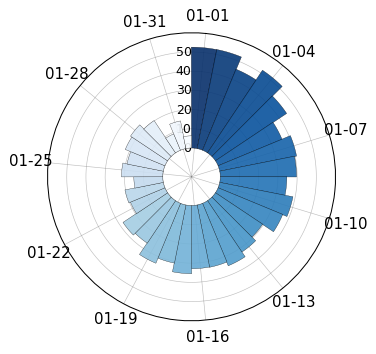

In [52]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 29 18:29:39 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import datetime
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
#plt.rc('axes',axisbelow=True)
plt.rcParams['axes.axisbelow'] = True


def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates

mydata=pd.DataFrame(dict(day=dateRange("2016-01-01", "2016-02-01"),
                      Price=-np.sort(-np.random.normal(loc=30,scale=10,size=32))+
                             np.random.normal(loc=3,scale=3,size=32)))

mydata['day']=pd.to_datetime(mydata['day'], format="%Y/%m/%d")

n_row=mydata.shape[0]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
radius = np.array(mydata.Price)

fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

cmap=cm.get_cmap('Blues_r',n_row)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]

plt.bar(angle,radius,color=color,alpha=0.9,width=0.2,align="center", linewidth=0.25)

plt.ylim(-15,60)
index=np.arange(0,n_row,3)
plt.xticks(angle[index],labels=[x.strftime('%m-%d') for x in mydata.day[index]],size=12)
plt.yticks(np.arange(0,60,10),verticalalignment='center',horizontalalignment='right')


plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('径向柱图.pdf')




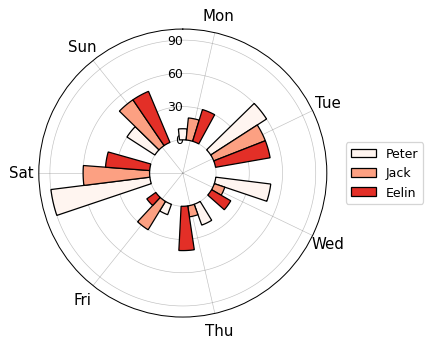

In [54]:
# 不同目标堆积图映射
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 29 17:56:15 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import numpy as np
from matplotlib import cm,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd

plt.rcParams["patch.force_edgecolor"] = True
   
mydata=pd.DataFrame(dict(day=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                      Peter=[10, 60, 50, 20,10,90,30],
                      Jack=[20,50, 10, 10,30,60,50],
                      Eelin=[30, 50, 20, 40,10,40,50]))

n_row = mydata.shape[0]
n_col= mydata.shape[1]
angle = np.arange(0,2*np.pi,2*np.pi/n_row)
    #绘制的数据
    
cmap=cm.get_cmap('Reds',n_col)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N) ]
    
radius1 = np.array(mydata.Peter)
radius2 = np.array(mydata.Jack)
radius3 = np.array(mydata.Eelin)

fig = figure(figsize=(4,4),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

#方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2)
#当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
#当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
#方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360)


barwidth1=0.2  
barwidth2=0.2
plt.bar(angle,radius1,width=barwidth2, align="center",color=color[0],edgecolor="k",alpha=1,label="Peter")
plt.bar(angle+barwidth1,radius2,width=barwidth2,align="center", color=color[1],edgecolor="k",alpha=1,label="Jack")
plt.bar(angle+barwidth1*2,radius3,width=barwidth2,align="center", color=color[2],edgecolor="k",alpha=1,label="Eelin")

plt.legend(loc="center",bbox_to_anchor=(1.2, 0, 0, 1))

plt.ylim(-30,100)
plt.xticks(angle+2*np.pi/n_row/4,labels=mydata.day,size=12)

plt.yticks(np.arange(0,101,30),verticalalignment='center',horizontalalignment='right')


plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

#fig.savefig('径向柱图2.pdf')


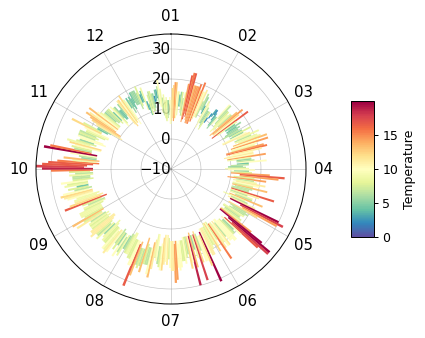

In [55]:
# 随时间变换很不规则使用极坐标跨度图

# -*- coding: utf-8 -*-
"""
Created on Thu Feb 28 16:45:50 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import numpy as np
from matplotlib import cm#,colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc

#import matplotlib.dates as mdates
import pandas as pd
#from datetime import datetime
import matplotlib as mpl
plt.rcParams["patch.force_edgecolor"] = True

#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#monthsFmt = mdates.DateFormatter('%M')

df=pd.read_csv('PloarRange_Data.csv')

fig = figure(figsize=(5,5),dpi =90)    
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)

plt.xticks(np.arange(0,359,30)/180*np.pi,["%.2d" % i for i in np.arange(1,13,1)], color="black", size=12)
plt.ylim(-10,35)
plt.yticks(np.arange(-10,40,10),color="black", size=12,verticalalignment='center',horizontalalignment='right')

plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

N = df.shape[0]

x_angles = [n / float(N) * 2 * np.pi for n in range(N)]
#x_angles += x_angles[:1]


upperlimits =(df['max.temperaturec']-df['min.temperaturec']).values
#upperlimits += upperlimits[:1]
lowerlimits = df['min.temperaturec'].values
#lowerlimits += lowerlimits[:1]

colors = cm.Spectral_r(upperlimits / float(max(upperlimits)))

#ax.bar(x_angles,lowerlimits, color='none',edgecolor='none',width=0.01,alpha=1)
#ax.bar(x_angles,upperlimits, color=colors,edgecolor='none',width=0.02, bottom=lowerlimits,alpha=1)

ax.bar(x_angles,lowerlimits, color='none',edgecolor='none',width=0.01,alpha=1)
ax.bar(x_angles,upperlimits, color=colors,edgecolor='none',width=0.02, bottom=lowerlimits,alpha=1)

ax2 = fig.add_axes([0.8, 0.25, 0.05, 0.3])
cmap = mpl.cm.Spectral_r
norm = mpl.colors.Normalize(vmin=0, vmax=20)
bounds = np.arange(0,20,0.1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm,boundaries=bounds,ticks=np.arange(0,20,5),spacing='proportional',label='Temperature')

plt.show()

#fig.savefig("图3-7-3极坐标跨度图_1.pdf")





# 雷达图
- 显示性能表现的理想之选

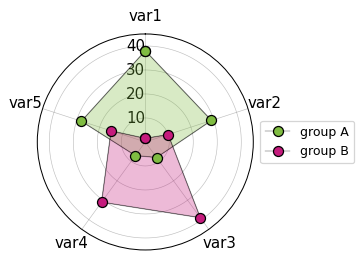

In [56]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 30 10:22:33 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.pyplot import figure, show, rc 
plt.rcParams["patch.force_edgecolor"] = True


df = pd.DataFrame(dict(categories=['var1', 'var2', 'var3', 'var4', 'var5'], group_A=[38.0, 29, 8, 7, 28], group_B=[1.5, 10, 39, 31, 15]))
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(4,4),dpi =90)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['categories'], color="black", size=12)
plt.ylim(0,45)
plt.yticks(np.arange(10,50,10),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['group_A'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#7FBC41', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#7FBC41', markersize=8, color='k', linewidth=0.25,label="group A")

values=df['group_B'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#C51B7D', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#C51B7D', markersize=8, color='k', linewidth=0.25,label="group B")
plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))


# 词云图
- 显示文本

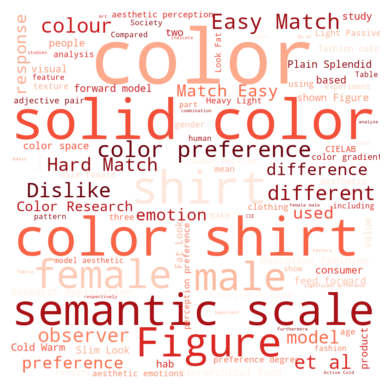

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}
[('label', 49), ('函数', 45), ('图4', 45), ('size', 39), ('colour black', 37), ('np', 35), ('alpha', 35), ('图3', 35), ('其中', 34), ('variable', 34), ('df', 31), ('mydata', 31), ('color black', 31), ('color', 30), ('plot', 29), ('图1', 28), ('df aes', 28), ('mydata aes', 27), ('library ggplot2', 27), ('plt', 26), ('brewer pal', 26), ('FALSE', 25), ('TRUE', 25), ('ggplot data', 24), ('axis', 23), ('Fair Good', 22), ('width', 21), ('图5', 20), ('ggplot df', 20), ('size colour', 20), ('aes fill', 20), ('read csv', 19), ('data frame', 19), ('index', 18), ('ggplot mydata', 18), ('如图 所示', 18), ('pd DataFrame', 17), ('fill Class', 17), ('如图3 所示', 17), ('value', 16), ('array', 16), ('df df', 16), ('shape size', 16), ('ggplot2 library', 16), ('library RColorBrewer', 16), ('如图1', 15), ('scale_x', 15), ('black fill', 15), ('value fill', 15), ('geom_point shape', 15)]
[('数据', 434), ('函数', 259), ('使用', 196), ('如图 所示', 131), ('其中', 113), ('数

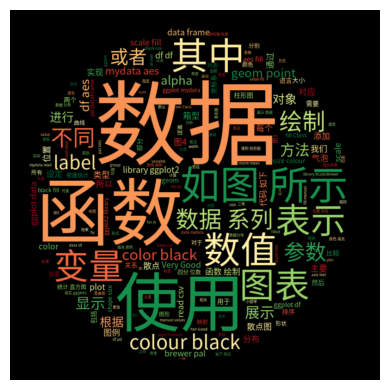

In [61]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  4 11:58:22 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import chardet
import jieba
import numpy as np
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc 

#-------------------------------------English-白色背景的方形词云图-----------------------------------------
# 获取当前文件路径

# 获取文本text
text = open('/content/WordCloud.txt',encoding='gbk').read()
# 生成词云
#wc = WordCloud(scale=2,max_font_size = 100)
wc=WordCloud(font_path=None,  # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
    width=400, # 默认宽度
    height=400, # 默认高度
    margin=2, # 边缘
    ranks_only=None, 
    prefer_horizontal=0.9, 
    mask=None, # 背景图形，如果想根据图片绘制，则需要设置
    scale=2, 
   color_func=None, 
   max_words=100, # 最多显示的词汇量
   min_font_size=4, # 最小字号
   stopwords=None, # 停止词设置，修正词云图时需要设置
   random_state=None, 
   background_color='white', # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
   max_font_size=None, # 最大字号
   font_step=1, 
   mode='RGB', 
   relative_scaling='auto', 
   regexp=None, 
   collocations=True, 
   colormap='Reds', # matplotlib 色图，可更改名称进而更改整体风格
   normalize_plurals=True, 
   contour_width=0, 
   contour_color='black', 
   repeat=False)

wc.generate_from_text(text)
# 显示图像

fig = figure(figsize=(4,4),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
#fig.savefig("词云图1.pdf")
plt.show()

#-------------------------------------中文-黑色背景的圆形词云图-----------------------------------------
text = open(path.join(d,'WordCloud_Chinese.txt'),'rb').read()
text_charInfo = chardet.detect(text)
print(text_charInfo)
# 结果
#{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
text = open(path.join(d,r'WordCloud_Chinese.txt'),encoding='GB2312',errors='ignore').read()


# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:50]) # # 获取文本词频最高的前50个词

text+=' '.join(jieba.cut(text,cut_all=False)) # cut_all=False 表示采用精确模式
#设置中文字体
font_path = 'SourceHanSansCN-Regular.otf'  # 思源黑体
# 读取背景图片
background_Image = np.array(Image.open("/content/WordCloud_Image.jpg"))
# 提取背景图片颜色
img_colors = ImageColorGenerator(background_Image)
# 设置中文停止词
stopwords = set('')
stopwords.update(['但是','一个','自己','因此','没有','很多','可以','这个','虽然','因为','这样','已经','现在','一些','比如','不是','当然','可能','如果','就是','同时','比如','这些','必须','由于','而且','并且','他们'])

wc = WordCloud(
        font_path = font_path, # 中文需设置路径
         #width=400, # 默认宽度
         #height=400, # 默认高度
        margin = 2, # 页面边缘
        mask = background_Image,
        scale = 2,
        max_words = 200, # 最多词个数
        min_font_size = 4, #
        stopwords = stopwords,
        random_state = 42,
        background_color = 'black', # 背景颜色
        #background_color = '#C3481A', # 背景颜色
        colormap='RdYlGn_r', # matplotlib 色图，可更改名称进而更改整体风格
        max_font_size = 100,
        )
wc.generate(text)
# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc,text)
sort = sorted(process_word.items(),key=lambda e:e[1],reverse=True)
print(sort[:50]) # 获取文本词频最高的前50个词
# 设置为背景色，若不想要背景图片颜色，就注释掉
#wc.recolor(color_func=img_colors)
#存储图像
#wc.to_file('浪潮之巅basic.png')
#显示图像
fig = figure(figsize=(4,4),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

#fig.savefig("词云图2.pdf")

plt.show()   